In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/netflix_movies_detailed_up_to_2025.csv')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'language',
       'description', 'popularity', 'vote_count', 'vote_average', 'budget',
       'revenue'],
      dtype='object')

In [ ]:
df.shape

(16000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: float64(4), int64(5), o

In [ ]:
df.isna().sum() #detect missing value or nan values

,0
show_id,0
type,0
title,0
director,132
cast,204
country,466
date_added,0
release_year,0
rating,0
duration,16000


In [ ]:
df.dtypes

,0
show_id,int64
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,float64
duration,float64


In [ ]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce',format='mixed')

In [ ]:
print(df['date_added'].dtype)

datetime64[ns]


In [ ]:
df.dtypes

,0
show_id,int64
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,float64
duration,float64


In [ ]:
df.isnull().values.any()

np.True_

In [ ]:
df.isnull().sum().sum()

np.int64(17041)

In [ ]:
df[df.isnull().any(axis=1)] # rows that contain missing value

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,1440286,Movie,Festival de Viña del Mar 2025: Ha*Ash,NaN,Ha*ash,Chile,2025-02-24,2025,0.000,NaN,Music,es,NaN,4.931,0,0.000,0,0
15996,1271724,Movie,Man and Woman,Vladimir Kott,"Anna Kotova, Stepan Devonin, Pavel Derevyanko,...",Russia,2025-03-13,2025,0.000,NaN,Drama,ru,Poignant stories about men and women who have ...,4.930,0,0.000,0,0
15997,1426364,Movie,Night of the Dead Sorority Babes,"Angel Nichole Bradford, Steve Hermann","Jessa Flux, Lynn Lowry, Angel Nichole Bradford...",NaN,2025-01-28,2025,1.000,NaN,Horror,en,Two villainous entities initiate gorgeous soro...,4.922,1,1.000,0,0
15998,1411248,Movie,A Dunces Burden,Daniel Kowal,"Riley G, Mitchel Corrado",NaN,2025-03-10,2025,0.000,NaN,NaN,en,A Dunces Burden,4.921,0,0.000,0,0


In [ ]:
df = df.drop('duration', axis=1)

In [ ]:
df.shape

(16000, 17)

In [ ]:
df['director'].fillna('Unknown',inplace=True)

/tmp/ipython-input-4009837435.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown',inplace=True)


In [ ]:
df['cast'].fillna(df['cast'].mode()[0],inplace=True)

/tmp/ipython-input-24154178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cast'].fillna(df['cast'].mode()[0],inplace=True)


In [ ]:
df['country'].fillna(df['country'].mode()[0],inplace=True)

/tmp/ipython-input-668350743.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0],inplace=True)


In [ ]:
#spliting country col and count
country=df['country'].astype(str).str.strip().str.split(',').explode()
c=country.value_counts().head()
print(c)

country
United States of America     6165
 United States of America    2063
United Kingdom               1050
France                       1030
Canada                        932
Name: count, dtype: int64


In [ ]:
#split cast col and count
new_cast=df['cast'].astype(str).str.strip('[]').str.split(', ').explode()
n=new_cast.value_counts().head()
print(n)


cast
Tomokazu Seki    230
Wasabi Mizuta    220
Yumi Kakazu      220
Megumi Oohara    220
Subaru Kimura    220
Name: count, dtype: int64


In [ ]:
df['genres'].fillna('Unknown',inplace=True)
df['description'].fillna('Unknown',inplace=True)
df[['genres','description']].isnull().sum()

/tmp/ipython-input-854079323.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['genres'].fillna('Unknown',inplace=True)
/tmp/ipython-input-854079323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

,0
genres,0
description,0


In [ ]:
df.shape


(16000, 17)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
genres,0


In [ ]:
#after filling the missing value
df.shape

(16000, 17)

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [ ]:
# revenue_by_year = df.groupby('release_year')['revenue'].sum()
# year_highest_revenue = revenue_by_year.idxmax()
# highest_revenue = revenue_by_year.max()

# print(f"The year with the highest total revenue is {int(year_highest_revenue)} with a total revenue of ${highest_revenue:,.2f}")

In [ ]:
# # sns.set(rc={'figure.figsize':(5,5)})
# # sns.barplot(x='title',y='release_year',data=df)
df['title'].groupby(df['release_year']).value_counts()


release_year  title                                              
2010          Leap Year                                              2
              #1 Cheerleader Camp                                    1
              127 Hours                                              1
              13                                                     1
              13 Assassins                                           1
                                                                    ..
2025          Царевна-лягушка                                        1
              Эффект хамелеона                                       1
              生死排爆                                                   1
              裏垢男子とAV男優どっちがエロい？素顔の美谷朱音を２人きりの空間でイカせまくる本気の生々ハメ撮り中出し    1
              차라리 죽여                                                 1
Name: count, Length: 15963, dtype: int64

In [ ]:
movies_by_year = df[df['type'] == 'Movie']['release_year'].value_counts().sort_index()
display(movies_by_year)

,count
release_year,
2010,1000
2011,1000
2012,1000
2013,1000
2014,1000
2015,1000
2016,1000
2017,1000
2018,1000


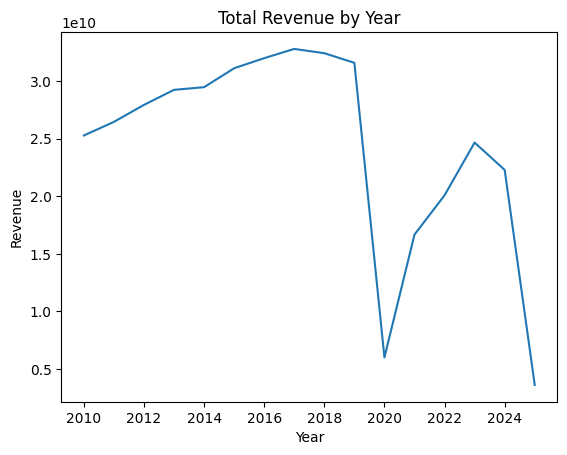

In [ ]:
df.groupby('release_year')['revenue'].sum().plot(kind='line')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

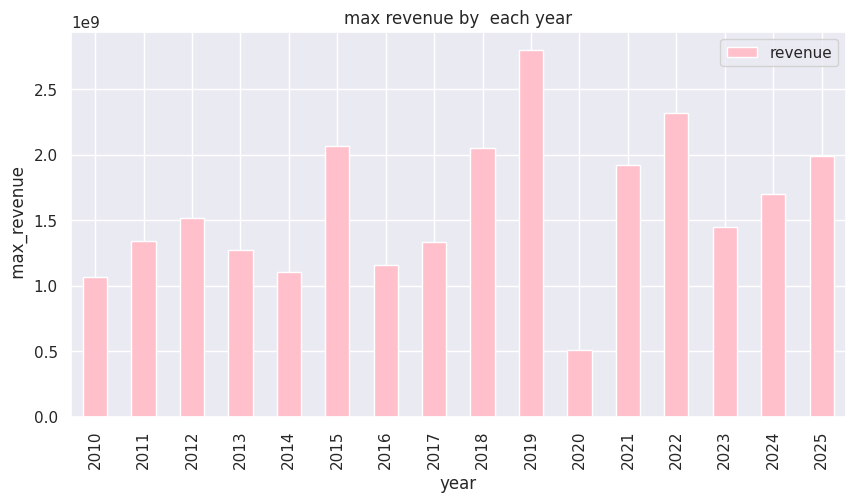

In [ ]:
df.groupby('release_year').agg({'revenue':'max'}).plot(kind='bar',color='pink')
plt.title('max revenue by  each year')
plt.xlabel('year')
plt.ylabel(' max_revenue')
plt.show()

In [ ]:
df.groupby('language')['title'].value_counts()

language  title                        
af        Hunting Emma                     1
          Moffie                           1
          Pad Na Jou Hart                  1
am        Alazar                           1
          Ke Tidar Belay                   1
                                          ..
zh        周处除三嗨                            1
          生死排爆                             1
zu        Umjolo: My Beginning, My End!    1
          Umjolo: The Gone Girl            1
          Umjolo: There Is No Cure         1
Name: count, Length: 15776, dtype: int64

In [ ]:
df['show_id'].is_unique

True

In [ ]:
genre_count=df['genres'].astype(str).str.strip().str.split(',').explode().str.strip().value_counts()
genre_count

,count
genres,
Drama,6910
Comedy,4533
Thriller,3769
Action,3239
Romance,2571
Horror,2425
Adventure,1768
Crime,1738
Animation,1579


/tmp/ipython-input-3524364919.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count.index, y=genre_count.values, palette='pastel')


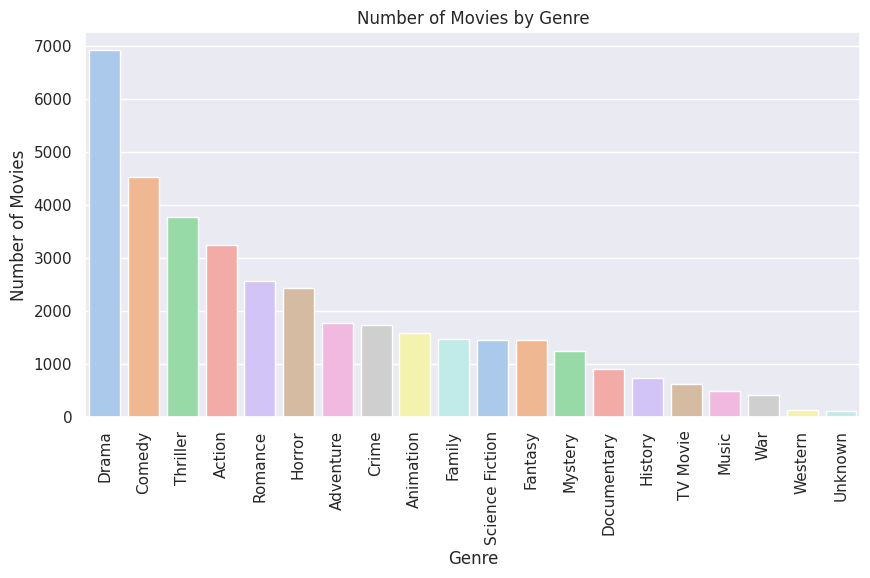

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=genre_count.index, y=genre_count.values, palette='pastel')
plt.xticks(rotation=90)
plt.title('Number of Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')

plt.show()

In [ ]:
df.groupby('genres')['description'].value_counts()

genres                             description                                                                                                                                                                                                                                                                                                                                                                                                      
Action                             Unknown                                                                                                                                                                                                                                                                                                                                                                                                              2
                                   A Marine must do whatever it takes to save his kidnapped sister and stop a terrorist attack masterminded by a radical militia group.                                                                                                                                                                                                                                                                                 1
                                   A Special Forces commando uncovers a dangerous conspiracy when she returns to her hometown looking for answers into her beloved father's death.                                                                                                                                                                                                                                                                      1
                                   A battle-scarred War on Terror bounty hunter is forced to go to London on a manhunt for a disavowed CIA operative, which leads him into a deadly running battle with a former military comrade and his private army.                                                                                                                                                                                                 1
                                   A college student must draw upon all the skills her spy-father taught her to protect herself and save her father from weapons dealers.                                                                                                                                                                                                                                                                               1
                                                                                                                                                                                                                                                                                                                                                                                                                                                       ..
Western, Mystery                   A former slave who arrives in Yellowstone City, Montana, a desolate former boomtown now on the decline, looking for a place to call home. On that same day, a local prospector discovers gold - and is murdered.                                                                                                                                                                                                     1
Western, Thriller                  In the late 1800s, a fanatical religious leader, a renegade Sheriff, and a former prostitute collide in a blood triangle on the rugged plains of the New Mexico Territory.                                                                                                                                                                                                                                           1
Western, Thriller, Action  

In [ ]:
#top 5 movies
top_10_movies=df.sort_values(by='rating',ascending=False).head()[['title','rating']]
display(top_10_movies)

,title,rating
15519,Red Silk,10.0
13340,Salome,10.0
15389,Mere Husband Ki Biwi,10.0
15346,The American Backyard,10.0
15280,Dragon,10.0


In [ ]:
#flop movies by rsting
least_10=df.sort_values(by='rating').head(10)[['title','rating']]
print(least_10)

                                             title  rating
15255                                      Mad Dog     0.0
15295                     The Love Club Moms: Nila     0.0
15294                                Lost Bullet 3     0.0
15293                          Blake Buried A Body     0.0
15291                                    Raspberry     0.0
15289  The SpongeBob Movie: Search for SquarePants     0.0
15288                                     Kannappa     0.0
15263                         Dios te salve, María     0.0
15262                               The Lost Tiger     0.0
15261                                 Shotgun Baby     0.0


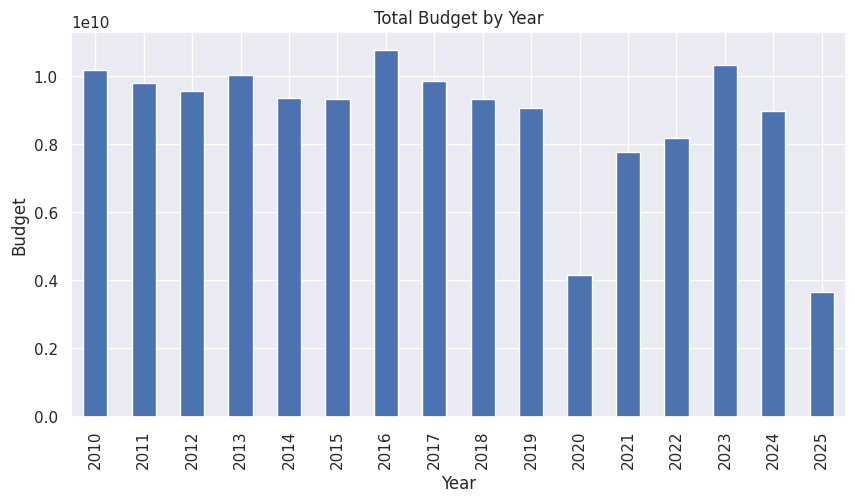

In [ ]:
#budget per year
df.groupby('release_year')['budget'].sum().plot(kind='bar')
plt.title('Total Budget by Year')
plt.xlabel('Year')
plt.ylabel('Budget')
plt.show()



In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [ ]:
df.groupby('language')[['title','rating']].agg({'rating':'max'}).reset_index()

,language,rating
0,af,6.700
1,am,0.000
2,ar,8.157
3,bg,0.000
4,bn,8.100
...,...,...
69,vi,7.300
70,xx,7.600
71,yo,6.600
72,zh,9.000


In [ ]:
#avg of budget by rating
df.groupby('rating').agg({'budget':'mean'}).reset_index()

,rating,budget
0,0.000,2.635934e+06
1,1.000,0.000000e+00
2,1.500,0.000000e+00
3,1.800,5.000000e+03
4,1.899,6.500000e+07
...,...,...
2140,9.300,0.000000e+00
2141,9.400,0.000000e+00
2142,9.500,0.000000e+00
2143,9.800,0.000000e+00


In [ ]:
# average_budget_by_rating = df.groupby('rating')['budget'].mean()

# rating_highest_avg_budget = average_budget_by_rating.idxmax()
# highest_avg_budget = average_budget_by_rating.max()

# # print(f"The rating with the highest average budget is {rating_highest_avg_budget} with an average budget of ${highest_avg_budget:,.2f}")

np.float64(6.076)

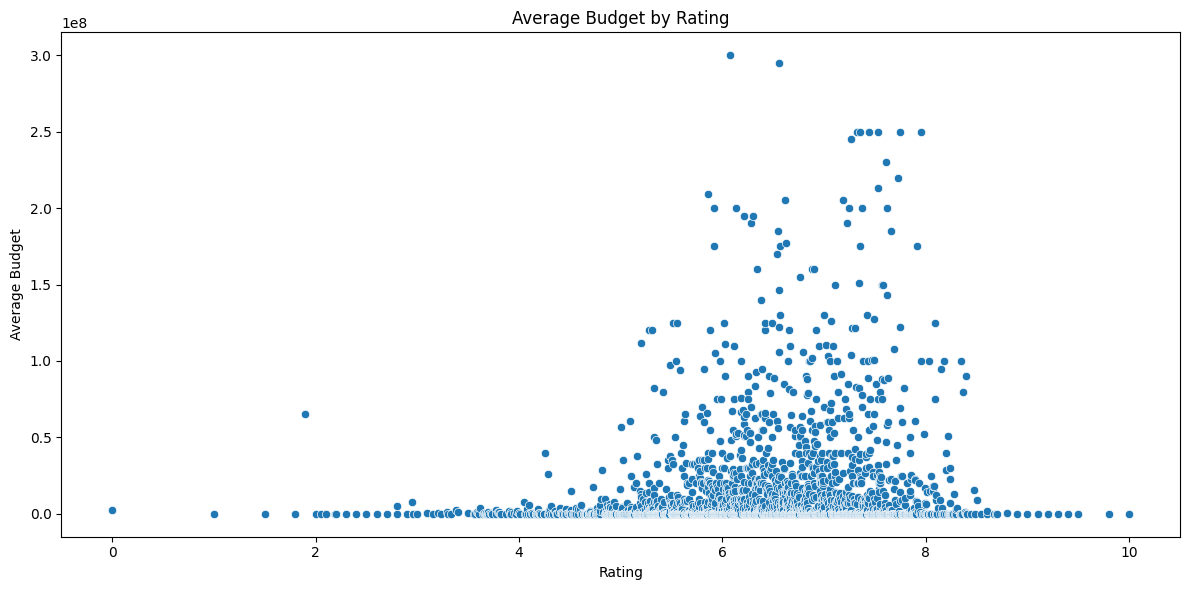

In [ ]:
# plt.figure(figsize=(12, 6))
# sns.scatterplot(x=average_budget_by_rating.index, y=average_budget_by_rating.values)
# plt.title('Average Budget by Rating')
# plt.xlabel('Rating')
# plt.ylabel('Average Budget')
# plt.tight_layout()
# plt.show()

In [ ]:
#avg budget by genre
avg_bud_genre=df.groupby('genres').agg({'budget':'mean'}).head()
avg_bud_genre

,budget
genres,
Action,1.691160e+06
"Action, Adventure",3.676562e+07
"Action, Adventure, Animation",0.000000e+00
"Action, Adventure, Animation, Comedy, Family",8.133333e+07
"Action, Adventure, Animation, Drama",0.000000e+00


In [ ]:
max_bud_rating=avg_bud_genre.idxmax()
max_budget=avg_bud_genre.max()
(max_bud_rating,max_budget)

(budget    Action, Adventure, Animation, Comedy, Family
 dtype: object,
 budget    8.133333e+07
 dtype: float64)

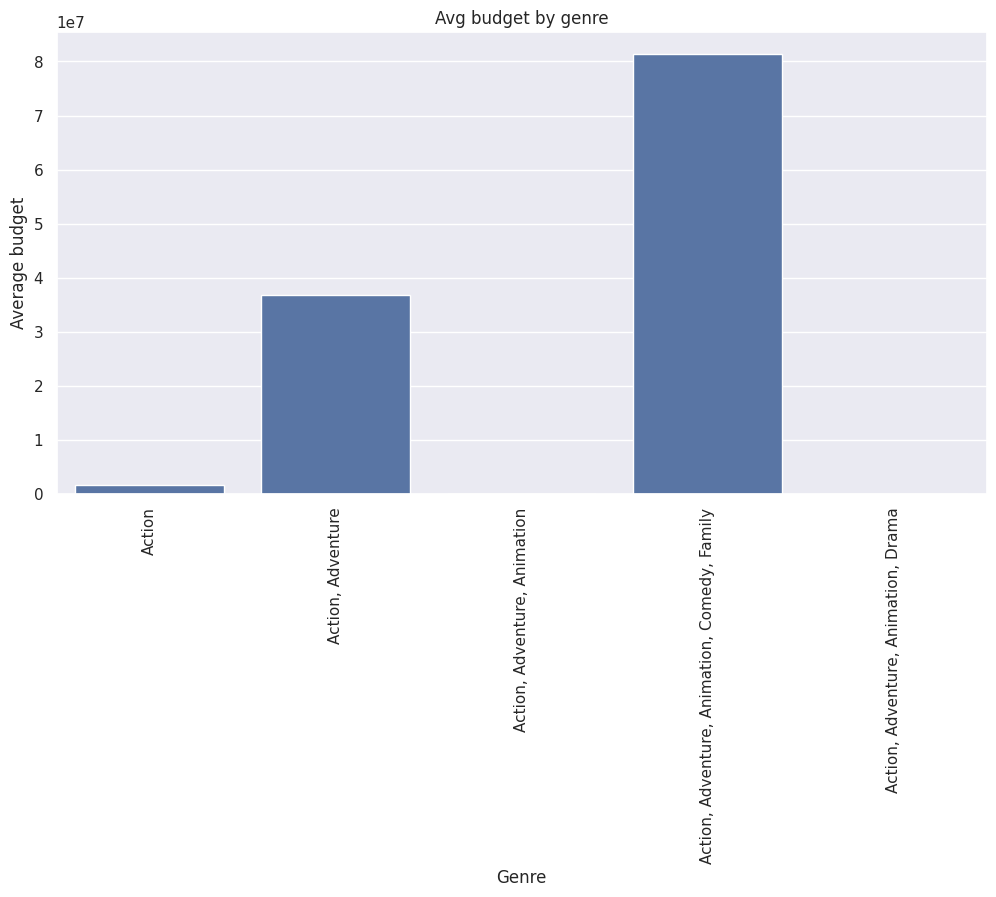

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_bud_genre.index,y=avg_bud_genre['budget'])
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Average budget')
plt.title('Avg budget by genre')
plt.show()

,revenue
release_year,
2010,1067316101
2011,1341511219
2012,1518815515
2013,1274219009
2014,1104054072
2015,2068223624
2016,1155046416
2017,1332698830
2018,2052415039


32772352432